In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("multiplelr.csv")

In [3]:
df

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

# Splitting

In [5]:
output_col="Target"

In [6]:
x=df.iloc[:,df.columns!=output_col]

In [7]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y=df.iloc[:,df.columns==output_col]

In [9]:
y.head()

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=43 )

In [11]:
df.shape

(200, 4)

In [12]:
x_train.shape

(140, 3)

In [13]:
y_train.shape

(140, 1)

In [14]:
x_test.shape

(60, 3)

In [15]:
y_test.shape

(60, 1)

# Multiple L R

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [18]:
lr.intercept_

array([3.0777745])

# Prediction

In [19]:
pred_value=lr.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test,pred_value)

In [21]:
cost

2.2412862530933477

In [22]:
pred_value

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [23]:
y_test

,Target
56,5.5
37,14.7
67,13.4
79,11.0
80,11.8
188,15.9
183,26.2
10,8.6
128,24.7
62,15.7


# ASSUMPTIONS IN LINEAR REGRESSION

1.Homoscedasticity

In [24]:
residuals=y_test-pred_value

In [25]:
residuals.head()

,Target
56,-2.917101
37,-0.661461
67,1.313807
79,1.240469
80,0.422008


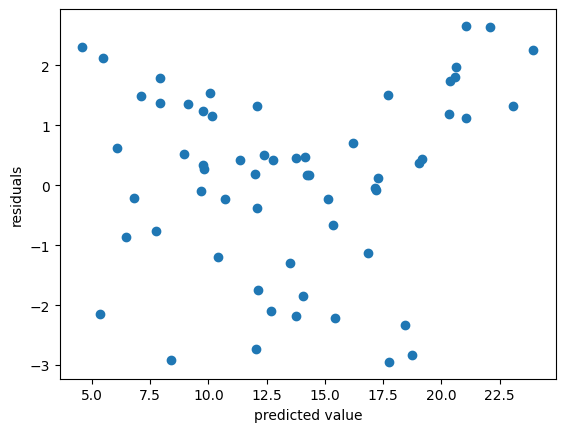

In [26]:
plt.scatter(pred_value,residuals)
plt.xlabel('predicted value')
plt.ylabel('residuals')
plt.show()

So its totally random and our assumption is correct

2.Normality of residuals

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_8088\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<AxesSubplot:ylabel='Density'>

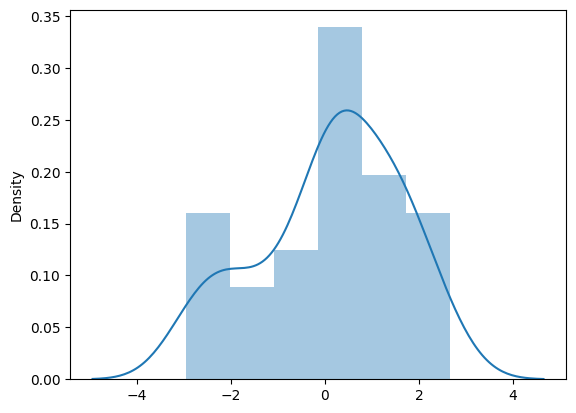

In [27]:
sns.distplot(residuals)

Its approx a normal distribution as most of errors are by '0'

# Ordinary Least Square(OLS) Method

In [29]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
import statsmodels.api as sm

In [32]:
x_with_const=sm.add_constant(x_train)
x_with_const.head()

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9


In [34]:
model=sm.OLS(y_train,x_with_const)

In [35]:
result=model.fit()

In [37]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [38]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [39]:
lr.intercept_

array([3.0777745])

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.67e-63
Time:                        11:21:06   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0